# Try predicting simple sequences with RNN
## Conclusion: prediction works ok!
- LSTM cells seem to work better than regular cells
- GRU didn't seem better than LSTM

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Sequence number 1: simple sums of harmonics

In [14]:
def generate_simple_harmonics(num_freqs=4, length=200, start=0, end=16):
    x = np.linspace(start, end, length)
    freqs = np.arange(num_freqs)
    coeffs = np.random.random(num_freqs) * 2 - 1
    individuals = np.stack([c*np.cos(f*x) for f, c in zip(freqs, coeffs)])
    return np.sum(individuals, axis=0)

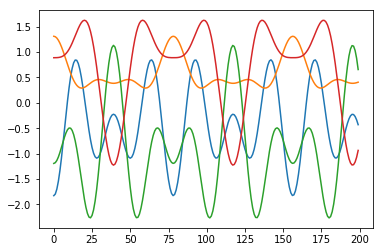

In [16]:
np.random.seed(17)
inputs = np.stack([generate_simple_harmonics() for i in range(10)])
for i in inputs[0:4]:
    plt.plot(i)
plt.show()

x_tr = inputs[:, 0:100]
y_tr = inputs[:, 100:]

In [48]:
def get_batch_harmonics(batch_size):
    vals = np.stack([generate_simple_harmonics() 
                     for i in range(batch_size)])
    x = vals[:, 0:100]
    y = vals[:, 100:]
    return x[..., np.newaxis], y[..., np.newaxis]

In [69]:
# Fixed number of steps
model_save_dir = 'models/series_prediction_01/ser_pred01'
n_steps = 100
tf.reset_default_graph()
X = tf.placeholder(tf.float32, [None, n_steps, 1]) # 1 input
Y = tf.placeholder(tf.float32, [None, n_steps, 1])
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicRNNCell(num_units=120, activation=tf.nn.elu), 
    output_size=1)
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
mse = tf.reduce_mean(tf.square(outputs - Y))
optimizer = tf.train.AdamOptimizer(learning_rate=1e-3)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()
saver = tf.train.Saver()
with tf.Session() as sess:
    init.run()
    
    for iteration in range(2001):
        x_batch, y_batch = get_batch_harmonics(20)
        sess.run(training_op, feed_dict={X: x_batch, Y: y_batch})
        if iteration % 100 == 0:
            mse_val = mse.eval(feed_dict={X: x_batch, Y: y_batch})
            print(iteration, "\tMSE:", mse_val)
    saver.save(sess, model_save_dir)

0 	MSE: 0.752004
100 	MSE: 0.510542
200 	MSE: 0.512344
300 	MSE: 0.463417
400 	MSE: 0.432191
500 	MSE: 0.400791
600 	MSE: 0.212414
700 	MSE: 0.226216
800 	MSE: 0.253008
900 	MSE: 0.334585
1000 	MSE: 0.244086
1100 	MSE: 0.242088
1200 	MSE: 0.211355
1300 	MSE: 0.335148
1400 	MSE: 0.251777
1500 	MSE: 0.300024
1600 	MSE: 0.166663
1700 	MSE: 0.220953
1800 	MSE: 0.239768
1900 	MSE: 0.243577
2000 	MSE: 0.196328


INFO:tensorflow:Restoring parameters from models/series_prediction_01/ser_pred01


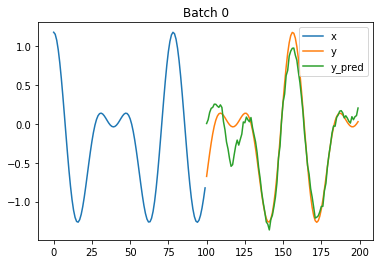

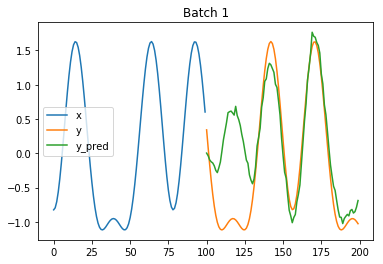

In [71]:
num_predictions = 2
with tf.Session() as sess:
    saver.restore(sess, model_save_dir)
    
    test_x, test_y = get_batch_harmonics(num_predictions)
    y_pred = sess.run(outputs, feed_dict={X: test_x})
for i in range(num_predictions):
    x_x = np.arange(test_x.shape[1])
    x_y = np.arange(test_y.shape[1]) + test_x.shape[1]
    plt.plot(x_x, test_x[i, :], label="x")
    plt.plot(x_y, test_y[i, :], label="y")
    plt.plot(x_y, y_pred[i, :, 0], label="y_pred")
    plt.title("Batch {}".format(i))
    plt.legend()
    plt.show()

### Try making a model using LSTM cells

In [73]:
# Fixed number of steps
model_save_dir = 'models/series_prediction_01/ser_pred02_lstm'
n_steps = 100
tf.reset_default_graph()
X = tf.placeholder(tf.float32, [None, n_steps, 1]) # 1 input
Y = tf.placeholder(tf.float32, [None, n_steps, 1])
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicLSTMCell(num_units=120, activation=tf.nn.elu), 
    output_size=1)
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
mse = tf.reduce_mean(tf.square(outputs - Y))
optimizer = tf.train.AdamOptimizer(learning_rate=1e-3)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()
saver = tf.train.Saver()
with tf.Session() as sess:
    init.run()
    
    for iteration in range(2001):
        x_batch, y_batch = get_batch_harmonics(20)
        sess.run(training_op, feed_dict={X: x_batch, Y: y_batch})
        if iteration % 100 == 0:
            mse_val = mse.eval(feed_dict={X: x_batch, Y: y_batch})
            print(iteration, "\tMSE:", mse_val)
    saver.save(sess, model_save_dir)

0 	MSE: 0.816198
100 	MSE: 0.525137
200 	MSE: 0.606196
300 	MSE: 0.429407
400 	MSE: 0.379819
500 	MSE: 0.315211
600 	MSE: 0.355896
700 	MSE: 0.370867
800 	MSE: 0.329114
900 	MSE: 0.242393
1000 	MSE: 0.185501
1100 	MSE: 0.211542
1200 	MSE: 0.240471
1300 	MSE: 0.247687
1400 	MSE: 0.190601
1500 	MSE: 0.181229
1600 	MSE: 0.205947
1700 	MSE: 0.19975
1800 	MSE: 0.224554
1900 	MSE: 0.24124
2000 	MSE: 0.166738


INFO:tensorflow:Restoring parameters from models/series_prediction_01/ser_pred02_lstm


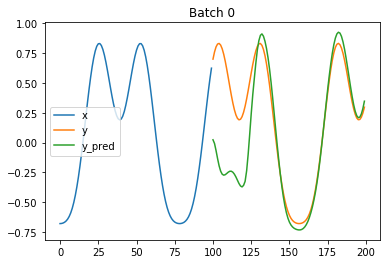

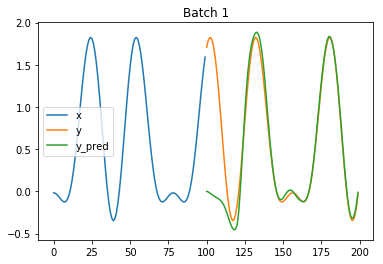

In [74]:
num_predictions = 2
with tf.Session() as sess:
    saver.restore(sess, model_save_dir)
    
    test_x, test_y = get_batch_harmonics(num_predictions)
    y_pred = sess.run(outputs, feed_dict={X: test_x})
for i in range(num_predictions):
    x_x = np.arange(test_x.shape[1])
    x_y = np.arange(test_y.shape[1]) + test_x.shape[1]
    plt.plot(x_x, test_x[i, :], label="x")
    plt.plot(x_y, test_y[i, :], label="y")
    plt.plot(x_y, y_pred[i, :, 0], label="y_pred")
    plt.title("Batch {}".format(i))
    plt.legend()
    plt.show()

#### Use LSTMCell instead of BasicLSTMCell

In [76]:
# Fixed number of steps
model_save_dir = 'models/series_prediction_01/ser_pred03_lstm_peephole'
n_steps = 100
tf.reset_default_graph()
X = tf.placeholder(tf.float32, [None, n_steps, 1]) # 1 input
Y = tf.placeholder(tf.float32, [None, n_steps, 1])
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.LSTMCell(num_units=120, activation=tf.nn.elu, 
                            use_peepholes=True), 
    output_size=1)
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
mse = tf.reduce_mean(tf.square(outputs - Y))
optimizer = tf.train.AdamOptimizer(learning_rate=1e-3)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()
saver = tf.train.Saver()
with tf.Session() as sess:
    init.run()
    
    for iteration in range(2001):
        x_batch, y_batch = get_batch_harmonics(20)
        sess.run(training_op, feed_dict={X: x_batch, Y: y_batch})
        if iteration % 100 == 0:
            mse_val = mse.eval(feed_dict={X: x_batch, Y: y_batch})
            print(iteration, "\tMSE:", mse_val)
    saver.save(sess, model_save_dir)

0 	MSE: 0.916807
100 	MSE: 0.57035
200 	MSE: 0.527531
300 	MSE: 0.379589
400 	MSE: 0.562864
500 	MSE: 0.353017
600 	MSE: 0.33959
700 	MSE: 0.293621
800 	MSE: 0.245787
900 	MSE: 0.355955
1000 	MSE: 0.278688
1100 	MSE: 0.134485
1200 	MSE: 0.202357
1300 	MSE: 0.24764
1400 	MSE: 0.192606
1500 	MSE: 0.190191
1600 	MSE: 0.239599
1700 	MSE: 0.242049
1800 	MSE: 0.231395
1900 	MSE: 0.241732
2000 	MSE: 0.260817


INFO:tensorflow:Restoring parameters from models/series_prediction_01/ser_pred03_lstm_peephole


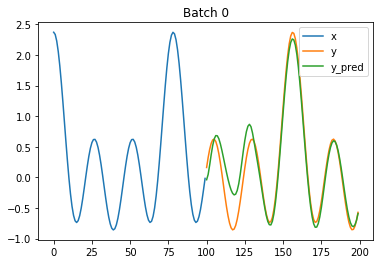

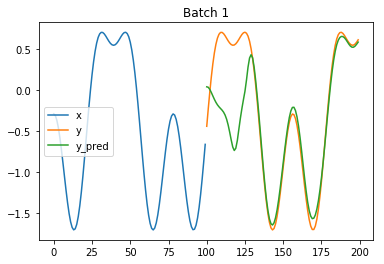

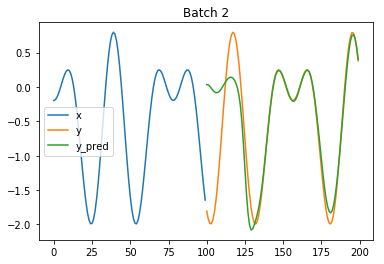

In [77]:
num_predictions = 3
with tf.Session() as sess:
    saver.restore(sess, model_save_dir)
    
    test_x, test_y = get_batch_harmonics(num_predictions)
    y_pred = sess.run(outputs, feed_dict={X: test_x})
for i in range(num_predictions):
    x_x = np.arange(test_x.shape[1])
    x_y = np.arange(test_y.shape[1]) + test_x.shape[1]
    plt.plot(x_x, test_x[i, :], label="x")
    plt.plot(x_y, test_y[i, :], label="y")
    plt.plot(x_y, y_pred[i, :, 0], label="y_pred")
    plt.title("Batch {}".format(i))
    plt.legend()
    plt.show()

#### Try GRU (gated recurrent unit)

In [78]:
# Fixed number of steps
model_save_dir = 'models/series_prediction_01/ser_pred04_gru'
n_steps = 100
tf.reset_default_graph()
X = tf.placeholder(tf.float32, [None, n_steps, 1]) # 1 input
Y = tf.placeholder(tf.float32, [None, n_steps, 1])
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.GRUCell(num_units=100, activation=tf.nn.elu), 
    output_size=1)
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
mse = tf.reduce_mean(tf.square(outputs - Y))
optimizer = tf.train.AdamOptimizer(learning_rate=1e-3)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()
saver = tf.train.Saver()
with tf.Session() as sess:
    init.run()
    
    for iteration in range(2001):
        x_batch, y_batch = get_batch_harmonics(20)
        sess.run(training_op, feed_dict={X: x_batch, Y: y_batch})
        if iteration % 100 == 0:
            mse_val = mse.eval(feed_dict={X: x_batch, Y: y_batch})
            print(iteration, "\tMSE:", mse_val)
    saver.save(sess, model_save_dir)

0 	MSE: 0.760552
100 	MSE: 0.44894
200 	MSE: 0.334685
300 	MSE: 0.326883
400 	MSE: 0.286968
500 	MSE: 0.277452
600 	MSE: 0.216354
700 	MSE: 0.243385
800 	MSE: 0.217631
900 	MSE: 0.210143
1000 	MSE: 0.169604
1100 	MSE: 0.232451
1200 	MSE: 0.19466
1300 	MSE: 0.238705
1400 	MSE: 0.231426
1500 	MSE: 0.23253
1600 	MSE: 0.110617
1700 	MSE: 0.224496
1800 	MSE: 0.205234
1900 	MSE: 0.167413
2000 	MSE: 0.258995


INFO:tensorflow:Restoring parameters from models/series_prediction_01/ser_pred04_gru


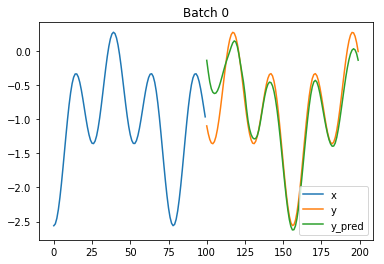

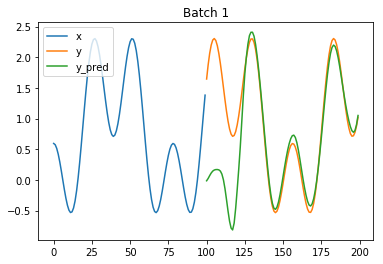

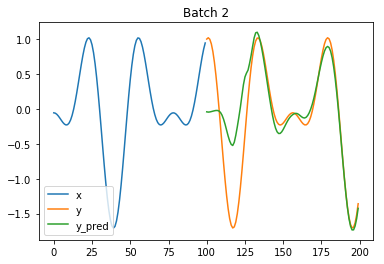

In [79]:
num_predictions = 3
with tf.Session() as sess:
    saver.restore(sess, model_save_dir)
    
    test_x, test_y = get_batch_harmonics(num_predictions)
    y_pred = sess.run(outputs, feed_dict={X: test_x})
for i in range(num_predictions):
    x_x = np.arange(test_x.shape[1])
    x_y = np.arange(test_y.shape[1]) + test_x.shape[1]
    plt.plot(x_x, test_x[i, :], label="x")
    plt.plot(x_y, test_y[i, :], label="y")
    plt.plot(x_y, y_pred[i, :, 0], label="y_pred")
    plt.title("Batch {}".format(i))
    plt.legend()
    plt.show()